#### ROHAN DAYAL 19CO060

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["encoded_species"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),encoded_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
print(df.shape)
df.isna().any()

(150, 5)


sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
encoded_species      False
dtype: bool

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),encoded_species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.encoded_species.value_counts()

2    50
1    50
0    50
Name: encoded_species, dtype: int64

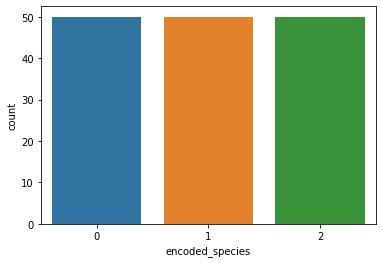

In [6]:
sns.countplot(df['encoded_species'])

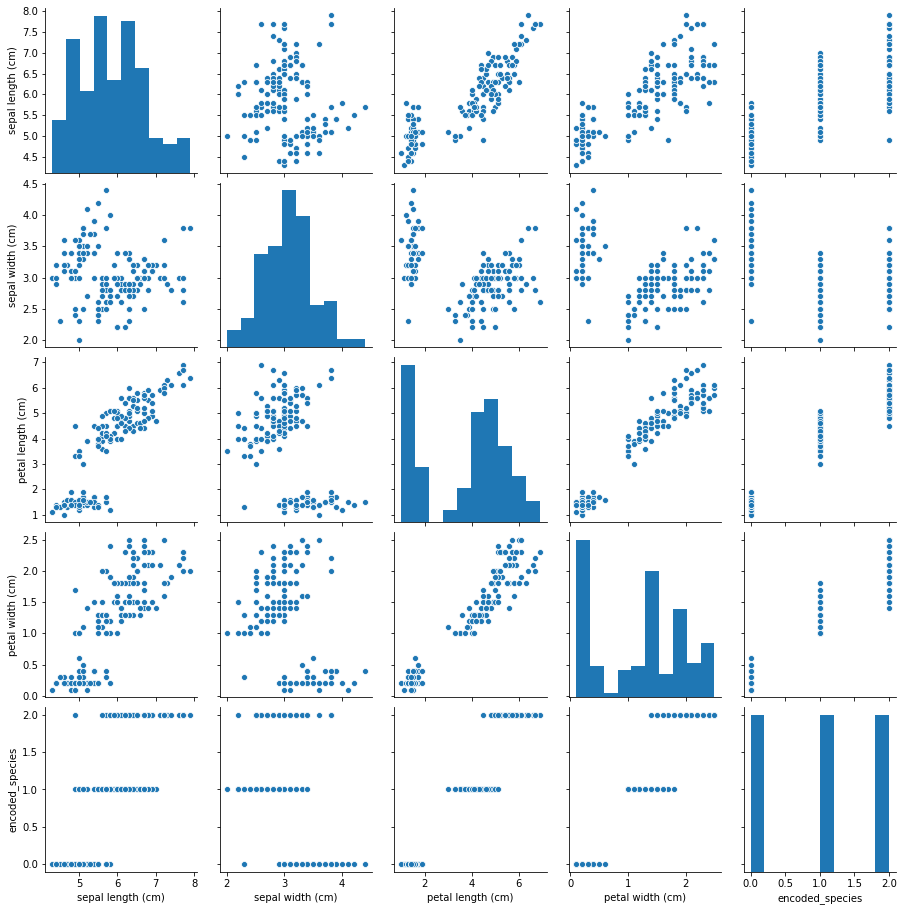

In [7]:
sns.pairplot(df)

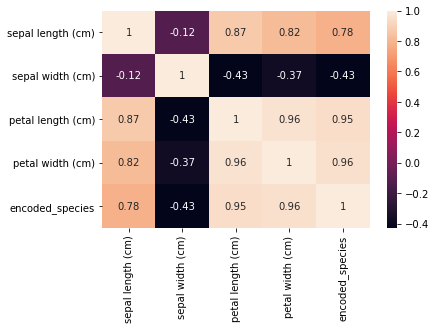

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['encoded_species']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [12]:
y_preds = nb.predict(X_test)

In [13]:
from sklearn.metrics import precision_score, recall_score , confusion_matrix, accuracy_score

print("Accuracy score:", accuracy_score(y_test, y_preds)*100,"%")

l = list(map(int,confusion_matrix(y_test, y_preds).ravel()))

Accuracy score: 90.0 %


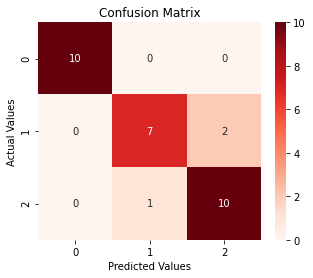

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True, cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [15]:
print('For encoded_species == 0 :')
tp = l[0] #cell 1
fn = l[1]+l[2] #cell 2 and 3
fp = l[3]+l[6] #cell 4 and 7
tn = sum(l) - (tp+fn+fp) #every other cell

print("Precision:", round(tp*100/(tp+fp),2),"%")
print("Recall:", round(tp*100/(tp+fn),2),"%")

print("Type 1 Error rate:", round(fp*100/(tp+fp+fn+tn),2),"%")
print("Type 2 Error rate:", round(fn*100/(tp+fp+fn+tn),2),"%")

print("TP =",tp,"FP =",fp,"TN =",tn,"FN =",fn)

For encoded_species == 0 :
Precision: 100.0 %
Recall: 100.0 %
Type 1 Error rate: 0.0 %
Type 2 Error rate: 0.0 %
TP = 10 FP = 0 TN = 20 FN = 0


In [16]:
print('For encoded_species == 1 :')
tp = l[4] #cell 5
fn = l[3]+l[5] #cell 4 and 6
fp = l[1]+l[7] #cell 2 and 8
tn = sum(l) - (tp+fn+fp) #every other cell

print("Precision:", round(tp*100/(tp+fp),2),"%")
print("Recall:", round(tp*100/(tp+fn),2),"%")

print("Type 1 Error rate:", round(fp*100/(tp+fp+fn+tn),2),"%")
print("Type 2 Error rate:", round(fn*100/(tp+fp+fn+tn),2),"%")

print("TP =",tp,"FP =",fp,"TN =",tn,"FN =",fn)

For encoded_species == 1 :
Precision: 87.5 %
Recall: 77.78 %
Type 1 Error rate: 3.33 %
Type 2 Error rate: 6.67 %
TP = 7 FP = 1 TN = 20 FN = 2


In [17]:
print('For encoded_species == 2 :')
tp = l[8] #cell 9
fn = l[6]+l[7] #cell 7 and 8
fp = l[2]+l[5] #cell 3 and 6
tn = sum(l) - (tp+fn+fp) #every other cell

print("Precision:", round(tp*100/(tp+fp),2),"%")
print("Recall:", round(tp*100/(tp+fn),2),"%")

print("Type 1 Error rate:", round(fp*100/(tp+fp+fn+tn),2),"%")
print("Type 2 Error rate:", round(fn*100/(tp+fp+fn+tn),2),"%")

print("TP =",tp,"FP =",fp,"TN =",tn,"FN =",fn)

For encoded_species == 2 :
Precision: 83.33 %
Recall: 90.91 %
Type 1 Error rate: 6.67 %
Type 2 Error rate: 3.33 %
TP = 10 FP = 2 TN = 17 FN = 1
